SVM 구현완료  
  
이전 처럼 행렬로 만들어서 처리할려다가 계속 오류가 발생해서 반복문으로 제어  
이부분이 속도차이를 만드는 것으로 생각  
  
역시나 sklearn에서 어떤 방법으로 강화하였는지는 미지수  
  
이번 문제에서는 logistic이 더 강력한 것으로 추정

In [1]:
# breast cancer
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

d = load_breast_cancer()

data = pd.DataFrame(d.data, columns=d.feature_names)
target = pd.DataFrame(d.target).replace(0, -1)

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [2]:
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(data, target.values)
accuracy_score(target, svc.predict(data))

c:\users\young\anaconda3\envs\study\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666080843585237

In [3]:
def hinge(x, y, w, b):
    if 1 - y * (x@w - b) > 0:
        return 1
    else:
        return 0
    
def custom_svc(x, y, w, b, lr=0.01, lamda=3):
    x = x.values
    y = y.values.flatten()
    loss = 0
    for k in range(len(x)):
        loss += max(0, 1-y[k]*(x[k]@w - b))/len(x)
    loss += w.T@w
    for j in range(len(w)):
        for i in range(len(x)):
            oper = hinge(x[i], y[i], w, b)
            w[j] += lr * oper*y[i]*x[i][j]/len(x)
        w[j] *= (1-lr*lamda)

    return w, loss
            

In [4]:
w = np.random.normal(0, 1, len(data.columns))
b = 1
hist = []
for _ in range(100):
    w, loss = custom_svc(data, target, w, b)
    hist.append(loss)
    if loss < 1e-3:
        break

In [5]:
w

array([ 0.04404764, -0.04696724,  0.2811807 , -0.02158555,  0.04624633,
       -0.07254741,  0.05184009,  0.03618195,  0.04896504, -0.07641445,
       -0.06440102, -0.02802094, -0.03902118,  0.10828616, -0.06659712,
       -0.15259037, -0.00877107,  0.07754397, -0.07843961, -0.02258112,
        0.10833327,  0.08189142,  0.74771087, -0.12240051,  0.0212996 ,
        0.09549456,  0.08880165,  0.01529138, -0.02114931,  0.00557618])

In [6]:
res = data.values @ w - b
print(res)

[-7.63960910e+01 -1.00356379e+02 -7.10370545e+01  2.31310411e+01
 -5.59529927e+01  4.80150864e+00 -6.15085510e+01 -6.07965497e+00
  7.63502887e+00  5.30343082e+00 -2.88087694e+01 -3.56105780e+01
 -2.11692481e+01 -4.78314031e+00  1.46653486e+01 -2.91454200e+00
 -2.70892169e+01 -3.61930088e+01 -1.28214919e+02  4.47358326e+00
  1.11562384e+01  2.40342742e+01 -5.58840859e+00 -1.56316245e+02
 -1.12285701e+02 -3.70489772e+01  7.36797941e-01 -4.31366382e+01
 -2.23865250e+01 -2.83429482e+01 -5.77014288e+01  2.76109170e-02
 -3.97244607e+01 -7.92902249e+01 -3.54011174e+01 -3.03493199e+01
  7.12640940e+00  1.16946380e+01  1.08821670e+01  6.82272218e+00
 -2.77510840e+00  1.90504017e+01 -4.21657636e+01 -7.56417521e+00
  5.08912028e+00 -5.67877318e+01  2.55142970e+01  1.83810175e+00
  1.22594474e+01  5.71738690e+00  1.55468667e+01  7.46526670e+00
  1.35270873e+01 -3.55535897e+01 -1.97568283e+01  1.52880010e+01
 -1.09927606e+02 -1.40936279e+01  8.37727716e+00  2.35456904e+01
  2.34647912e+01  2.69354

In [7]:
accuracy_score(target, list(map(lambda x: 1 if x > 0 else -1, res)))

0.8840070298769771

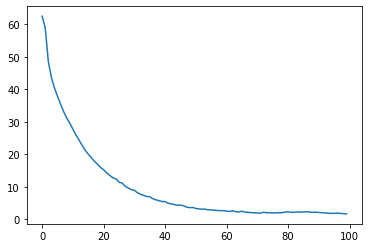

In [8]:
sns.lineplot(data=np.array(hist))

In [9]:
import keras 
from keras import layers, models
from keras.regularizers import L1L2

m1 = models.Sequential()
m1.add(layers.Dense(1, activation='linear', kernel_regularizer=L1L2(l1=0, l2=3)))

m1.compile(optimizer = 'adam',
          loss = 'hinge')

Using TensorFlow backend.


In [10]:
m1.fit(data.values, target.values,
      epochs=200)

Epoch 1/200
569/569 [==============================] - 0s 610us/step - loss: 35.0713
Epoch 2/200
569/569 [==============================] - 0s 60us/step - loss: 31.5822
Epoch 3/200
569/569 [==============================] - 0s 60us/step - loss: 29.7721
Epoch 4/200
569/569 [==============================] - 0s 65us/step - loss: 28.1306
Epoch 5/200
569/569 [==============================] - 0s 61us/step - loss: 26.4788
Epoch 6/200
569/569 [==============================] - 0s 61us/step - loss: 24.8953
Epoch 7/200
569/569 [==============================] - 0s 60us/step - loss: 23.3372
Epoch 8/200
569/569 [==============================] - 0s 61us/step - loss: 21.8577
Epoch 9/200
569/569 [==============================] - 0s 60us/step - loss: 20.3927
Epoch 10/200
569/569 [==============================] - 0s 63us/step - loss: 19.0142
Epoch 11/200
569/569 [==============================] - 0s 61us/step - loss: 17.7271
Epoch 12/200
569/569 [==============================] - 0s 61us/step - lo

569/569 [==============================] - 0s 61us/step - loss: 0.3359
Epoch 99/200
569/569 [==============================] - 0s 68us/step - loss: 0.3334
Epoch 100/200
569/569 [==============================] - 0s 65us/step - loss: 0.3285
Epoch 101/200
569/569 [==============================] - 0s 65us/step - loss: 0.3164
Epoch 102/200
569/569 [==============================] - 0s 65us/step - loss: 0.3119
Epoch 103/200
569/569 [==============================] - 0s 65us/step - loss: 0.3255
Epoch 104/200
569/569 [==============================] - 0s 63us/step - loss: 0.3025
Epoch 105/200
569/569 [==============================] - 0s 67us/step - loss: 0.2945
Epoch 106/200
569/569 [==============================] - 0s 68us/step - loss: 0.2969
Epoch 107/200
569/569 [==============================] - 0s 67us/step - loss: 0.3027
Epoch 108/200
569/569 [==============================] - 0s 65us/step - loss: 0.2911
Epoch 109/200
569/569 [==============================] - 0s 65us/step - loss: 0.

569/569 [==============================] - 0s 67us/step - loss: 0.2276
Epoch 195/200
569/569 [==============================] - 0s 65us/step - loss: 0.2148
Epoch 196/200
569/569 [==============================] - 0s 68us/step - loss: 0.2614
Epoch 197/200
569/569 [==============================] - 0s 67us/step - loss: 0.2307
Epoch 198/200
569/569 [==============================] - 0s 65us/step - loss: 0.2204
Epoch 199/200
569/569 [==============================] - 0s 67us/step - loss: 0.2328
Epoch 200/200
569/569 [==============================] - 0s 68us/step - loss: 0.2172


In [11]:
accuracy_score(target.replace(-1, 0), m1.predict_classes(data))

0.9086115992970123